<a href="https://colab.research.google.com/github/Mano1720/DL-ML-/blob/main/Assignment_11_REGex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Task 11
**K Manoj**

*Referral Id:SIRSS2309*


##Unzip the dataset

In [ ]:
!pip install py7zr
from py7zr import unpack_7zarchive
import shutil
shutil.register_unpack_format('7zip', ['.7z'], unpack_7zarchive)

# unzip train and test data
shutil.unpack_archive('../input/cifar-10/train.7z')
shutil.unpack_archive('../input/cifar-10/test.7z')

     |████████████████████████████████| 65 kB 589 kB/s 
     |████████████████████████████████| 1.9 MB 1.1 MB/s 
     |████████████████████████████████| 357 kB 55.2 MB/s 
     |████████████████████████████████| 2.2 MB 50.1 MB/s 
     |████████████████████████████████| 124 kB 61.9 MB/s 


## Import necessary packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import shutil

import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Dropout, Dense, Flatten

2021-09-13 03:30:38.934799: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


## Load the data

In [ ]:
train_dir = os.listdir('./train')
train_dir_len = len(train_dir)
print("Length:\t", train_dir_len)

Length:	 50000


In [ ]:
train_labels = pd.read_csv('../input/cifar-10/trainLabels.csv')
train_images = pd.DataFrame(columns=['id', 'label', 'path'], dtype=str)
test_labels = pd.read_csv('../input/cifar-10/sampleSubmission.csv')

In [ ]:
train_root = './train/'
for i in range(0, train_dir_len):
    path = train_root + str(i+1) + '.png'
    if os.path.exists(path):
        train_images = train_images.append([{
            'id': train_labels['id'].iloc[i],
            'label': train_labels['label'].iloc[i],
            'path': str(i+1) + '.png'
        }])
        
train_images.head()

,id,label,path
0,1,frog,1.png
0,2,truck,2.png
0,3,truck,3.png
0,4,deer,4.png
0,5,automobile,5.png


In [ ]:
display_groupby = train_images.groupby(['label']).count()
display_groupby.head(10)

,id,path
label,,
airplane,5000,5000
automobile,5000,5000
bird,5000,5000
cat,5000,5000
deer,5000,5000
dog,5000,5000
frog,5000,5000
horse,5000,5000
ship,5000,5000


In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for name in class_names:
    index = class_names.index(name)
    train_images.loc[train_images['label'] == name, 'label'] = str(index)

display_groupby = train_images.groupby(['label']).count()
display_groupby.head(10)

,id,path
label,,
0,5000,5000
1,5000,5000
2,5000,5000
3,5000,5000
4,5000,5000
5,5000,5000
6,5000,5000
7,5000,5000
8,5000,5000


In [ ]:
BATCH_SIZE = 64
NUM_CLASSES = 10

In [ ]:
train_images.head()

,id,label,path
0,1,6,1.png
0,2,9,2.png
0,3,9,3.png
0,4,4,4.png
0,5,1,5.png


## Image Data Generator

In [ ]:
data_generator = ImageDataGenerator(rescale=1/255.,
                                   validation_split=0.2,
                                   horizontal_flip=True)

train_generator = data_generator.flow_from_dataframe(dataframe=train_images, 
                                                    directory='./train/',
                                                    x_col='path',
                                                     y_col='label',
                                                     subset='training',
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(32,32),
                                                     class_mode='categorical')

validation_generator = data_generator.flow_from_dataframe(dataframe=train_images,
                                                         directory='./train/',
                                                         x_col='path',
                                                         y_col='label',
                                                         subset='validation',
                                                         batch_size=BATCH_SIZE,
                                                         shuffle=True,
                                                         target_size=(32,32),
                                                         class_mode='categorical')

Found 40000 validated image filenames belonging to 10 classes.
Found 10000 validated image filenames belonging to 10 classes.


## Modeling

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.2))

model.add(Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.3))

model.add(Conv2D(128, kernel_size=3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(0.001), metrics=['accuracy'])
model.summary()

2021-09-13 03:33:16.213976: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-09-13 03:33:16.217841: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-09-13 03:33:16.257859: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-13 03:33:16.258551: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2021-09-13 03:33:16.258612: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-09-13 03:33:16.284110: I tensorflow/stream_executor/platform/def

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        1

In [ ]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=5, factor=0.6, min_denta=0.00001)
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15, verbose=1, restore_best_weights=True)

history = model.fit(train_generator, epochs=100, validation_data=validation_generator, callbacks=[reduce_lr, es])

2021-09-13 03:33:18.552297: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-09-13 03:33:18.556170: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2000220000 Hz


Epoch 1/100


2021-09-13 03:33:19.828620: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2021-09-13 03:33:20.639032: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11
2021-09-13 03:33:20.669194: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.8


625/625 [==============================] - 24s 27ms/step - loss: 2.0149 - accuracy: 0.3355 - val_loss: 1.3834 - val_accuracy: 0.5153
Epoch 2/100
625/625 [==============================] - 15s 24ms/step - loss: 1.1798 - accuracy: 0.5812 - val_loss: 0.9086 - val_accuracy: 0.6746
Epoch 3/100
625/625 [==============================] - 15s 25ms/step - loss: 0.9398 - accuracy: 0.6704 - val_loss: 0.8183 - val_accuracy: 0.7076
Epoch 4/100
625/625 [==============================] - 16s 25ms/step - loss: 0.8371 - accuracy: 0.7079 - val_loss: 0.8098 - val_accuracy: 0.7199
Epoch 5/100
625/625 [==============================] - 16s 25ms/step - loss: 0.7587 - accuracy: 0.7341 - val_loss: 0.6942 - val_accuracy: 0.7566
Epoch 6/100
625/625 [==============================] - 16s 25ms/step - loss: 0.6987 - accuracy: 0.7583 - val_loss: 0.8147 - val_accuracy: 0.7121
Epoch 7/100
625/625 [==============================] - 15s 25ms/step - loss: 0.6583 - accuracy: 0.7744 - val_loss: 0.6139 - val_accuracy: 0.78

## Visualize `accuracy` and `loss`

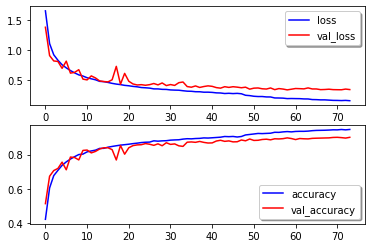

In [ ]:
_, ax = plt.subplots(2, 1)
ax[0].plot(history.history['loss'], color='b', label='loss')
ax[0].plot(history.history['val_loss'], color='r', label='val_loss')
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label='accuracy')
ax[1].plot(history.history['val_accuracy'], color='r', label='val_accuracy')
legend = ax[1].legend(loc='best', shadow=True)

## Prediction

In [ ]:
!mkdir ./data/
!mv ./test ./data

In [ ]:
test_data_generator = ImageDataGenerator(rescale=1./255.)
test_generator = test_data_generator.flow_from_directory(directory='./data',
            batch_size=BATCH_SIZE,
            shuffle=False,color_mode='rgb',
            target_size=(32,32),
            class_mode=None)

Found 300000 images belonging to 1 classes.


In [ ]:
prediction = model.predict(test_generator)

In [ ]:
prediction = np.argmax(prediction, axis=1)
submission = pd.DataFrame(columns=['id', 'label'], dtype=str)
submission['label'] = [class_names[int(i)] for i in prediction]
submission['id'] = [ (''.join(filter(str.isdigit, name ))) for name in test_generator.filenames]

submission.sort_values(by=['id'])
submission.head()

,id,label
0,1,deer
1,10,cat
2,100,deer
3,1000,deer
4,10000,frog
